# MTpy Example 07

## Resistivity and Phase Pseudosections

A pseudosection plot distance on the x-axis and period on the y-axis.  This provides a plot that is an proxy for structures at depth. You will see obvious static shifts and suspect data.  The phase is often better to analyze because it is invariant to static shifts.

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib inline

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
%%time
with MTCollection() as mc:
    mc.open_collection(Path().cwd().joinpath("yellowstone_mt_collection.h5"))
    mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.str.startswith("SR2")]
    dgh_mt_data = mc.to_mt_data()

24:10:17T16:26:00 | INFO | line:777 |mth5.mth5 | close_mth5 | Flushing and closing /home/jovyan/earthscope-mt-course/notebooks/mtpy/yellowstone_mt_collection.h5
CPU times: user 20 s, sys: 248 ms, total: 20.3 s
Wall time: 21.1 s


### Set the UTM Coordinate System

To estimate physical distances in meters, we need to set the UTM coordinate system.  The 2D line is in WGS84 UTM Zone 12N, which is EPSG number 32612

In [3]:
dgh_mt_data.utm_epsg = 32612

## Plot Phase Tensor Pseudosection for the Snake River Plane stations

Since the DeGroot-Hedlin Snake River Plane line was collected with 2D modeling in mind, lets use that for an example.  

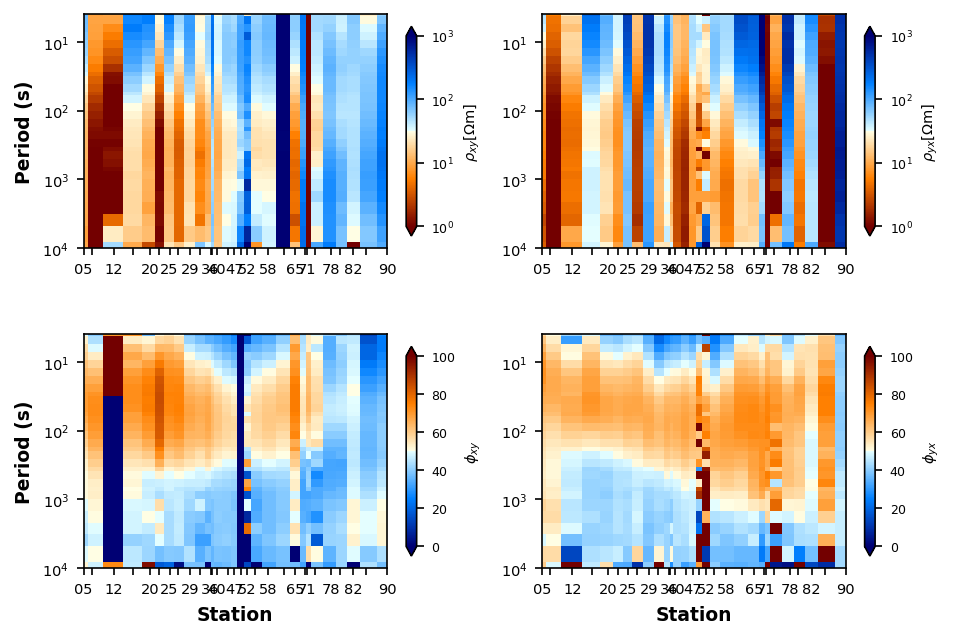

In [4]:
plot_rp_pseudosection = dgh_mt_data.plot_resistivity_phase_pseudosections( 
    fig_num=1, 
    profile_reverse=True,
    station_id=[3, None],
    station_step=2,
    y_stretch=80000,
)

### Adjust Interpolation

If you want to try to minimize the bad data points we can play around with interpolation methods and median filtering.  This should be done with caution in that the stations are spaced equally which can make weighting unnatural.  

##### Cubic Spline interpolation

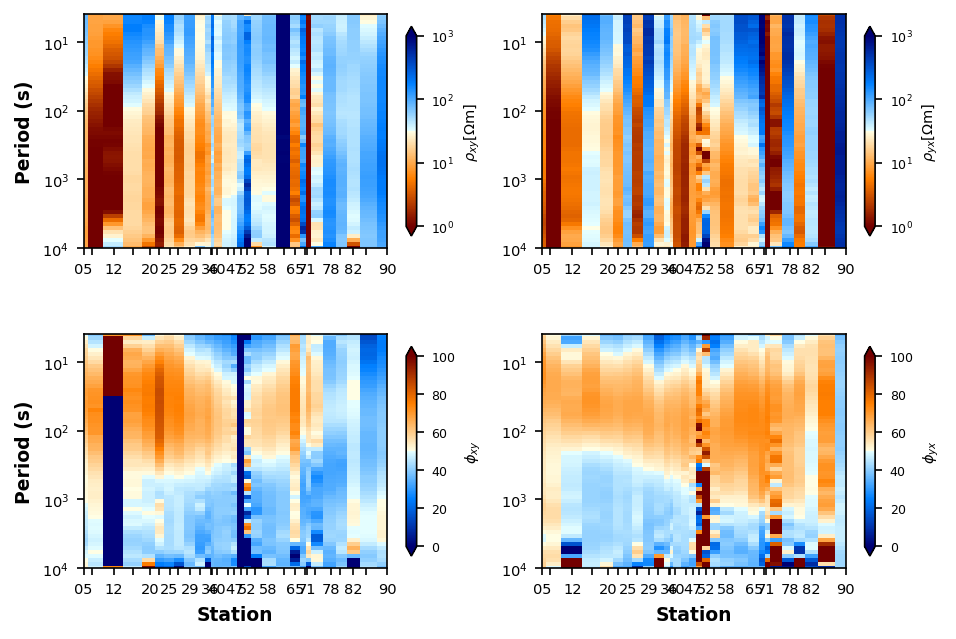

In [5]:
plot_rp_pseudosection.interpolation_method = "cubic"
plot_rp_pseudosection.fig_num = 2
plot_rp_pseudosection.redraw_plot()

##### Median Filter 2D

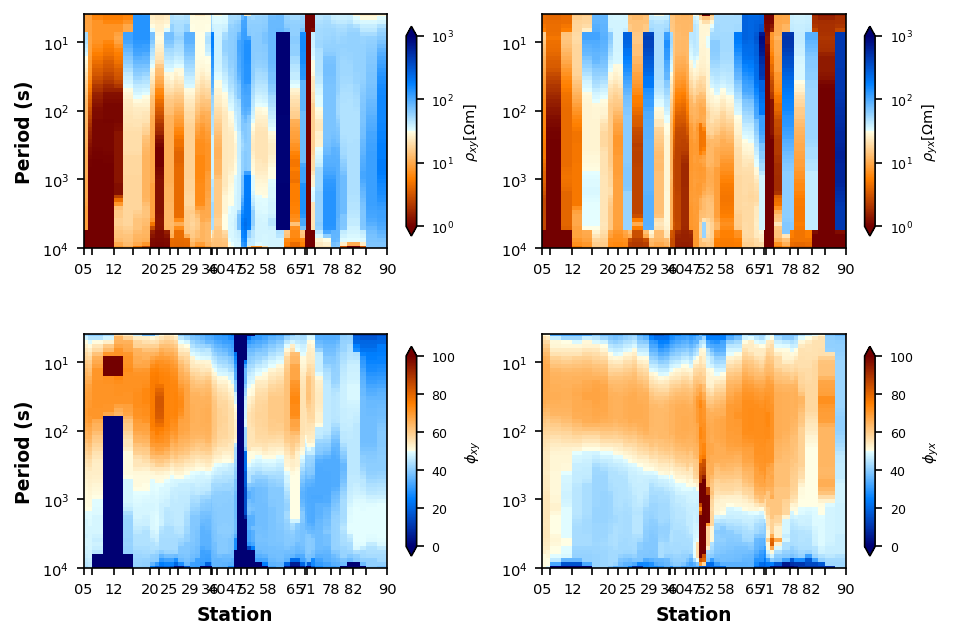

In [6]:
plot_rp_pseudosection.median_filter_kernel = (13, 7)
plot_rp_pseudosection.fig_num = 3
plot_rp_pseudosection.redraw_plot()

##### Delaunay Triangulation

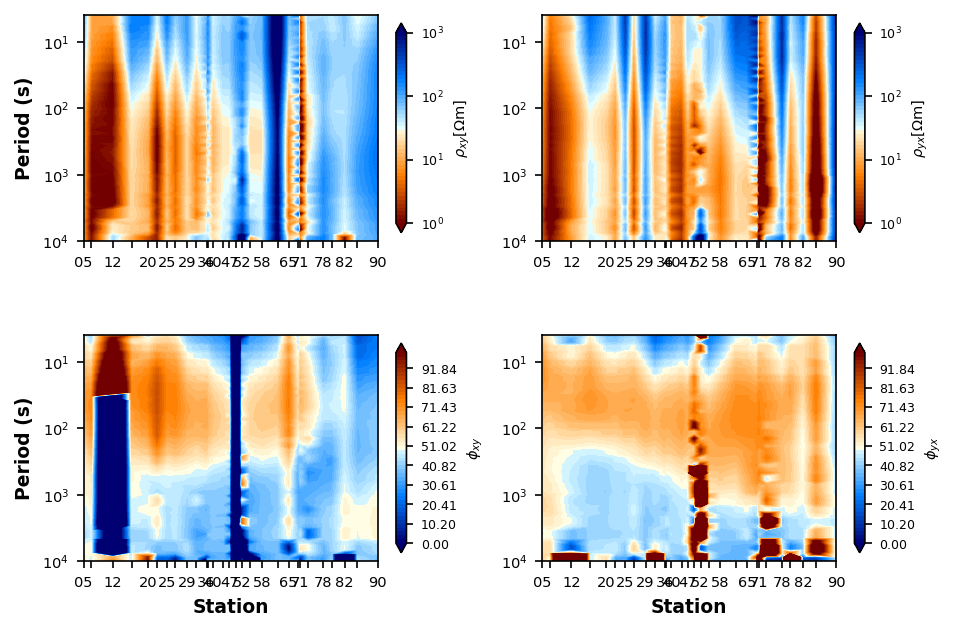

In [7]:
plot_rp_pseudosection.interpolation_method = "delaunay"
plot_rp_pseudosection.fig_num = 4
plot_rp_pseudosection.redraw_plot()

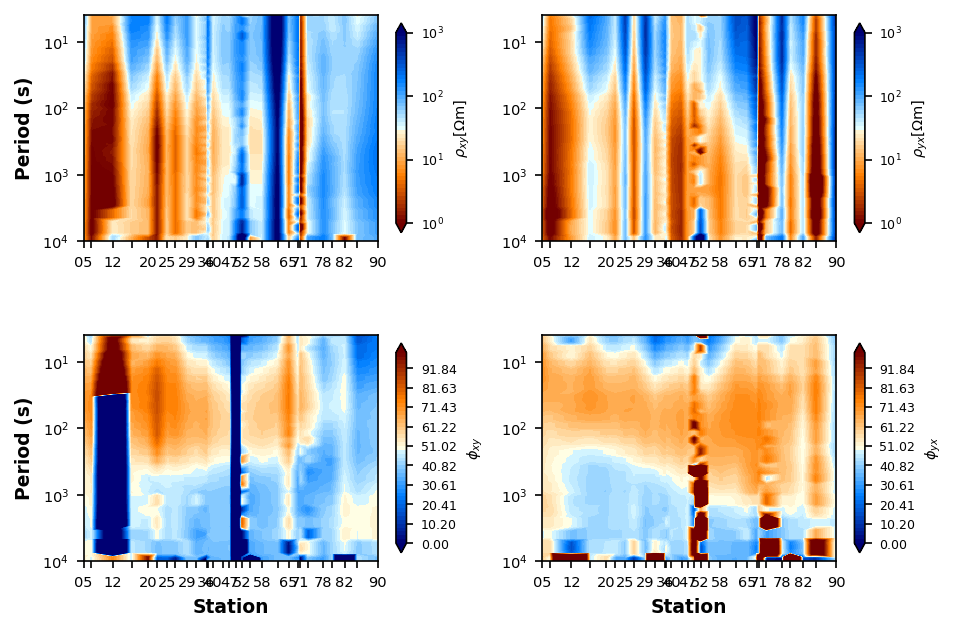

In [8]:
plot_rp_pseudosection.interpolation_power = 13
plot_rp_pseudosection.nearest_neighbors = 5
plot_rp_pseudosection.fig_num = 5
plot_rp_pseudosection.redraw_plot()